In [17]:
import pandas as pd
import numpy as np

from sklearn import metrics

import tensorflow as tf
import tensorflow_probability as tfp

import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'


In [44]:
classes = ['a', 'b', 'c', 'd']

p = np.array([[0, 1, 0, 0]])
q = np.array([[0.2, 0.5, 0.2, 0.1]])

# p = np.array([
#     [0, 1, 0, 0],
#     [0, 0, 1, 0],
#     [0, 0, 1, 0],
#     [1, 0, 0, 0],
#     [0, 0, 0, 1]
# ])
# q = np.array([
#     [0.2, 0.5, 0.2, 0.1],
#     [0.3, 0.1, 0.4, 0.2],
#     [0.2, 0.1, 0.5, 0.2],
#     [0.85, 0.05, 0.05, 0.05],
#     [0.1, 0.1, 0.1, 0.7]
# ])

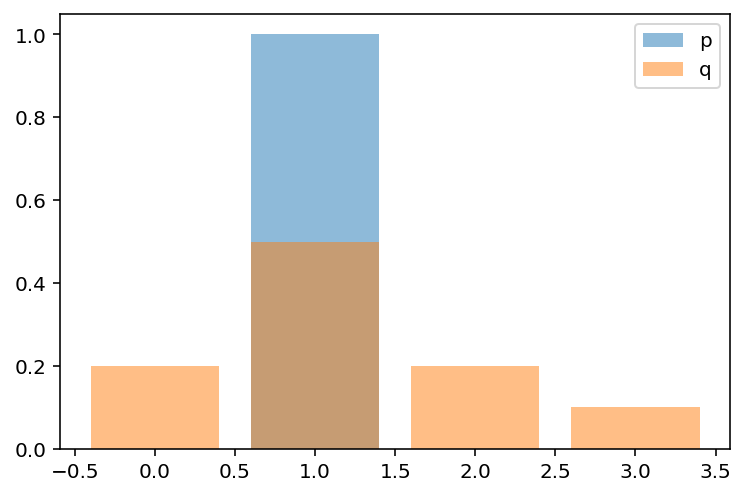

In [45]:
plt.bar(x=np.arange(0, p.shape[1]), height=p[0], alpha=0.5, label='p')
plt.bar(x=np.arange(0, q.shape[1]), height=q[0], alpha=0.5, label='q')
plt.legend();

In [ ]:
def to_cdf(x):
    return np.cumsum(x, axis=1)

In [46]:
def brier_multi(targets, probs):
    # https://stats.stackexchange.com/questions/403544/how-to-compute-the-brier-score-for-more-than-two-classes
    return np.mean(np.sum((probs - targets)**2, axis=1))

In [50]:
brier_multi(p, q)

0.3400000000000001

In [55]:



def rps(targets, probs):
    targets = to_cdf(targets)
    probs = to_cdf(probs)
    

    return np.sum((probs - targets)**2, axis=1)



In [56]:
rps(p, q)

array([0.14])

In [53]:
def rps(predictions, observed):
    """Vectorized version of Ranked Probability Score.
    A lower value is a better score.
    From: Colin Catlin, https://syllepsis.live/2022/01/22/ranked-probability-score-in-python/

    Args:
        predictions (pd.DataFrame): each column is an outcome category
            with values as the 0 to 1 probability of that category
        observed (pd.DataFrame): each column is an outcome category
            with values of 0 OR 1 with 1 being that category occurred
    """
    assert (
        predictions.shape == observed.shape
    ), "prediction and observed array shapes must match"
    ncat = predictions.shape[1] - 1
    return (
        np.sum(
            (np.cumsum(predictions, axis=1) - np.cumsum(observed, axis=1)) ** 2, axis=1
        ) / ncat
    )


In [54]:
rps(q, p)

array([0.04666667])

In [ ]:
# Why are they dividing by ncat

In [42]:
p

array([[0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1]])

In [43]:
to_cdf(p)

array([[0, 1, 1, 1],
       [0, 0, 1, 1],
       [0, 0, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 1]])

In [9]:
p = np.array([
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [0, 0, 1, 0],
    [1, 0, 0, 0],
    [0, 0, 0, 1]
])
q = np.array([
    [0.2, 0.5, 0.2, 0.1],
    [0.3, 0.1, 0.4, 0.2],
    [0.2, 0.1, 0.5, 0.2],
    [0.85, 0.05, 0.05, 0.05],
    [0.1, 0.1, 0.1, 0.7]
])

In [97]:
def drps_1(p, q):
    num_bins = q.shape[1]
    N = q.shape[0]

    p = to_cdf(p)
    q = to_cdf(q)

    total = 0
    for i in range(0, N):
        q_i = q[i, :]
        p_i = p[i, :]

        for bin_ in range(num_bins):
            total += (q_i[bin_] - p_i[bin_]) ** 2

    return total / N
    

drps_1(p, q)

0.15500000000000003

In [98]:
def brier_score(p, q):
    return (sum(q) - sum(p)) ** 2


def drps_2(p, q):
    num_bins = q.shape[1]
    N = q.shape[0]

    total = 0
    for i in range(0, N):
        q_i = q[i, :]
        p_i = p[i, :]
        for bin_ in range(1, num_bins + 1):
            total += brier_score(p_i[0:bin_], q_i[0:bin_])

    return total / N


drps_2(p, q)

0.15500000000000003

In [99]:
# Decomposition

def reli(p, q):

    N = q.shape[0]

    total = 0
    for i in range(0, N):
        q_i = q[i, :]
        p_i = p[i, :]
        total += sum((p_i - q_i)**2) # Iter over bins occurs here

    return total


def resol(p, q):

    num_bins = q.shape[1]
    N = q.shape[0]

    total = 0
    for i in range(0, N):
        q_i = q[i, :]
        p_i = p[i, :]

        observed = []
        for bin_ in range(num_bins):
            p[:, bin_].sum() / p.shape[0]
    

    return


def u():


    return


def o(x):

    N = x.shape[0]
    for i in range(0, N):


In [100]:
reli(p, q)

1.3300000000000003

In [ ]:
def brier_score(p, q):
    return (sum(q) - sum(p)) ** 2


def drps_2(p, q):
    num_bins = q.shape[1]
    N = q.shape[0]

    total = 0
    for i in range(0, N):
        q_i = q[i, :]
        p_i = p[i, :]
        for bin_ in range(1, num_bins + 1):
            total += brier_score(p_i[0:bin_], q_i[0:bin_])

    return total / N


drps_2(p, q)

In [102]:
# !pip install tensorflow-probability

InvalidArgumentError: {{function_node __wrapped__Pack_N_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} Shapes of all inputs must match: values[0].shape = [1] != values[1].shape = [1,4] [Op:Pack] name: stack

In [6]:
p_tens.shape

TensorShape([1, 4])

In [7]:
q_tens.shape

TensorShape([1, 4])

In [16]:
p_tens = tf.convert_to_tensor(np.where(p == 1)[1])
q_tens = tf.convert_to_tensor(q)

In [18]:
uncertainty, resolution, reliability = tfp.stats.brier_decomposition(
    p_tens, q_tens
)

In [22]:
uncertainty.numpy() - resolution.numpy() + reliability.numpy()

-0.496996947512806

In [26]:
p_tens

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([1, 2, 2, 0, 3])>

In [28]:
q_tens

array([1., 1., 1., 1., 1.])

In [30]:
res = tfp.stats.brier_score(
    p_tens, q_tens
)

<tf.Tensor: shape=(5,), dtype=float64, numpy=array([-0.37816056, -0.32418922, -0.37816056, -0.56054062, -0.48393378])>

In [38]:
labels = tf.convert_to_tensor(np.where(p == 1)[1])
probabilities = tf.convert_to_tensor(q)
# probabilities = tf.math.softmax(logits, axis=1)

num_classes = probabilities.shape[-1]
plabel = probabilities * tf.one_hot(labels, depth=num_classes,
                                    dtype=probabilities.dtype)
plabel = tf.reduce_sum(plabel, axis=-1)
res = tf.reduce_sum(tf.square(probabilities), axis=-1) - 2. * plabel

In [39]:
res

<tf.Tensor: shape=(5,), dtype=float64, numpy=array([-0.66, -0.5 , -0.66, -0.97, -0.88])>

In [40]:
import sklearn

In [45]:
from sklearn.metrics import brier_score_loss

In [46]:
brier_score_loss(p, q)

ValueError: y should be a 1d array, got an array of shape (5, 4) instead.